# Exercise 1

## 2.1 Plotting The Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

In [186]:
df = pd.read_csv("ex1data1.txt", header=None, names=['City Population', 'Food Truck Profit'])

In [187]:
df.head()

,City Population,Food Truck Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [188]:
df.describe()

,City Population,Food Truck Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


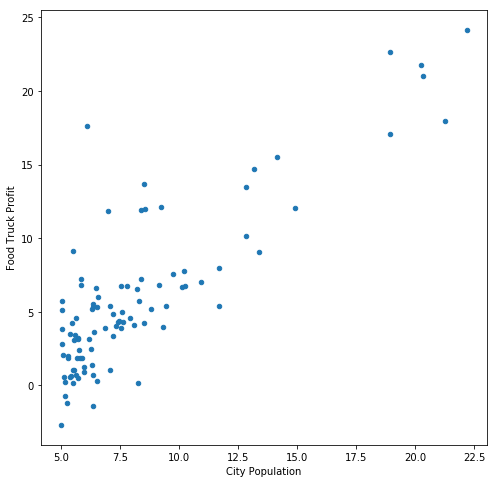

In [189]:
X = df.as_matrix(columns=df.columns[:1])
y = df.as_matrix(columns=df.columns[1:])
df.plot(kind='scatter', x='City Population', y='Food Truck Profit', figsize=(8,8))

## Gradient Descent

### Also for multivariant 

In [317]:
def computeJThetaCost(X, y, theta):
    ''' X: Matrix - data matrix
        y: column vector - result vector
        theta: row vector - Model vector'''
    resultInnerVector = np.power((X * np.transpose(theta)) - y, 2)
    m = X.shape[0]
    sumOfSquares = np.sum(resultInnerVector)
    return (1/float(2*m))*sumOfSquares

def getXyThetaFromData(pathToCSV, useRandomTheta, useNormalization):
    df = pd.read_csv(pathToCSV, header=None)
    df_mean = df.mean()
    df_std = df.std()
    if useNormalization:
        df = (df - df_mean)/df_std
    df.insert(0, 'Ones', 1)
    m, n = df.shape # number of samples, number of features + 1
    X = np.matrix(df.as_matrix(columns=df.columns[:n-1]))
    y = np.matrix(df.as_matrix(columns=df.columns[n-1:]))
    theta = np.matrix(np.zeros(n-1) if not useRandomTheta else 5*np.random.random_sample(size=n-1))
    return X, y, theta, df_mean, df_std

In [318]:
def findThetaValues(X, y, theta, alpha, numberOfIters, converganceTreshold):
    currentCost = 0
    newCost = computeJThetaCost(X, y, theta)
    costFunction = []
    while ((numberOfIters > 0)  if numberOfIters is not None 
           else (np.abs(newCost - currentCost) > converganceTreshold)):
        theta = computeNewTheta(X, y, theta, alpha)
        currentCost = newCost
        newCost = computeJThetaCost(X, y, theta)
        costFunction.append(newCost)
        numberOfIters = (numberOfIters - 1) if numberOfIters is not None else None
    
    return theta, costFunction

def computeNewTheta(X, y, theta, alpha):
    newTheta = np.matrix(np.zeros(theta.shape[1])) # For not overwrite the original theta values
    numOfFeature = theta.shape[1]
    m = X.shape[0]
    constMult = (X * np.transpose(theta)) - y
    for j in range(numOfFeature):
        innerMult = np.multiply(constMult, X[:, j])
        newTheta[0, j] = theta[0, j ] - (float(alpha)/float(m))*np.sum(innerMult)

    return newTheta

In [322]:
def linearRegression(pathToCSV, useNormalization=False, useRandomTheta=False, 
                     computeWithIters=False, debugMode=False,
                     converganceTreshold=0.01, alpha=0.01):
    
    ''' input: path to csv file containing the data
        output: the model (theta matrix) and the normaliztion'''
    
    X, y, theta, df_std, df_mean = getXyThetaFromData(pathToCSV, useRandomTheta, useNormalization)
    theta, costFunction = findThetaValues(X, y, theta, numberOfIters=1000 if computeWithIters else None, 
                            converganceTreshold=converganceTreshold, alpha=alpha)
    print(costFunction[-1])
    if debugMode:
        fig, ax = plt.subplots(figsize=(12,8))  
        ax.plot(costFunction, 'r')  
        ax.set_xlabel('Iterations')  
        ax.set_ylabel('Cost')  
        ax.set_title('Error vs. Training Epoch')
    
    return theta, df_std, df_mean

## With sklearn! VERY WOW! MUCH Easy!

In [1]:
from sklearn import linear_model

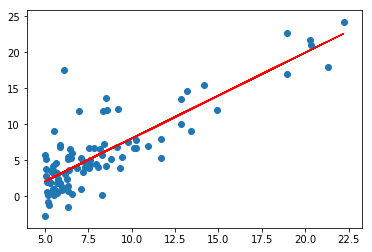

In [21]:
linearModel = linear_model.LinearRegression()
df = pd.read_csv("ex1data1.txt", header=None)
X = np.matrix(df.as_matrix(columns=df.columns[:1]))
y = np.matrix(df.as_matrix(columns=df.columns[1:]))
linearModel.fit(X, y)
x = np.array(X)
f = linearModel.predict(X)
ax = plt.subplot()
ax.plot(x, f, 'r')
ax.scatter(df[0], df[1])